In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df_train = pd.read_excel("C:/FlightFare/Train_set.xlsx")

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df_train.isnull().mean()*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [6]:
df_train.dropna(inplace=True)

In [7]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Handling DataTime data type variables

In [8]:
## Changing the dtype to 'datetime' type for variables containing dates

df_train['Date_of_Journey'] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y")

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.4+ KB


In [10]:
column_1 = df_train['Date_of_Journey']

df1 = pd.DataFrame({"Journey_Year": column_1.dt.year,
              "Journey_Month": column_1.dt.month,
              "Journey_Week": column_1.dt.week,
              "Journey_Day": column_1.dt.day,              
              "Journey_Day_of_year": column_1.dt.dayofyear,              
              "Journey_Week_of_year": column_1.dt.weekofyear,
              "Journey_Day_of_week": column_1.dt.dayofweek,
              "Journey_Quarter": column_1.dt.quarter,
             })

In [11]:
df1

,Journey_Year,Journey_Month,Journey_Week,Journey_Day,Journey_Day_of_year,Journey_Week_of_year,Journey_Day_of_week,Journey_Quarter
0,2019,3,12,24,83,12,6,1
1,2019,5,18,1,121,18,2,2
2,2019,6,23,9,160,23,6,2
3,2019,5,19,12,132,19,6,2
4,2019,3,9,1,60,9,4,1
...,...,...,...,...,...,...,...,...
10678,2019,4,15,9,99,15,1,2
10679,2019,4,17,27,117,17,5,2
10680,2019,4,17,27,117,17,5,2
10681,2019,3,9,1,60,9,4,1


In [12]:
df1.nunique()

Journey_Year             1
Journey_Month            4
Journey_Week            18
Journey_Day             10
Journey_Day_of_year     40
Journey_Week_of_year    18
Journey_Day_of_week      7
Journey_Quarter          2
dtype: int64

In [13]:
df_train = pd.concat([df_train,df1], axis = 1)

In [14]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Week,Journey_Day,Journey_Day_of_year,Journey_Week_of_year,Journey_Day_of_week,Journey_Quarter
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,12,24,83,12,6,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,5,18,1,121,18,2,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,23,9,160,23,6,2
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,5,19,12,132,19,6,2
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,3,9,1,60,9,4,1


In [15]:
df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [16]:
# Departure time is when a plane leaves the gate. 

# Extracting Hours
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour

# Extracting Minutes
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [17]:
# Arrival time is when the plane pulls up to the gate.


# Extracting Hours
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour

# Extracting Minutes
df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [18]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Year', 'Journey_Month',
       'Journey_Week', 'Journey_Day', 'Journey_Day_of_year',
       'Journey_Week_of_year', 'Journey_Day_of_week', 'Journey_Quarter',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [19]:

# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [20]:
# Adding duration_hours and duration_mins list to train_data dataframe

df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

In [21]:
df_train.drop(["Duration"], axis = 1, inplace = True)

In [22]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Week,...,Journey_Day_of_year,Journey_Week_of_year,Journey_Day_of_week,Journey_Quarter,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,12,...,83,12,6,1,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,5,18,...,121,18,2,2,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,6,23,...,160,23,6,2,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,5,19,...,132,19,6,2,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,3,9,...,60,9,4,1,16,50,21,35,4,45


### Handling Categorical variables

In [23]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

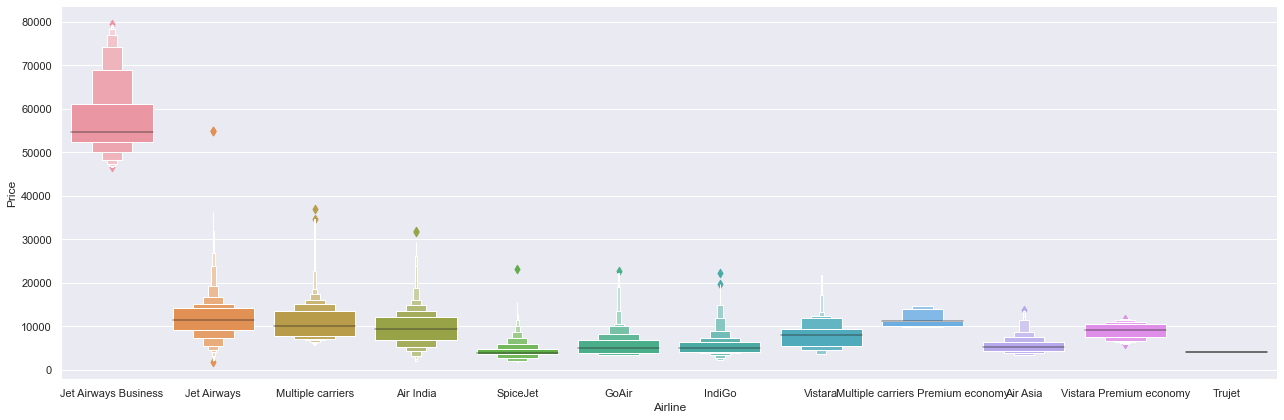

In [24]:
sns.catplot(y = "Price", x = "Airline", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

#### From graph we can see that Jet Airways Business has the highest Price.


In [25]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df_train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [26]:
print(df_train["Source"].value_counts())
print("*"*100)
print(df_train["Destination"].value_counts())

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
****************************************************************************************************
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [27]:
Source = df_train[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Destination = df_train[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first= True)

In [28]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [29]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [30]:
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [32]:
df_train["Total_Stops"].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [33]:
df_train = pd.concat([df_train, Airline, Source, Destination], axis = 1)
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Week,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,2019,3,12,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,2019,5,18,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,2019,6,23,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,2019,5,19,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,2019,3,9,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [35]:
df_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [36]:
df_train.head()

,Total_Stops,Price,Journey_Year,Journey_Month,Journey_Week,Journey_Day,Journey_Day_of_year,Journey_Week_of_year,Journey_Day_of_week,Journey_Quarter,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2019,3,12,24,83,12,6,1,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,2019,5,18,1,121,18,2,2,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,2019,6,23,9,160,23,6,2,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,2019,5,19,12,132,19,6,2,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,2019,3,9,1,60,9,4,1,...,0,0,0,0,0,0,0,0,0,1


In [37]:
df_train.shape

(10682, 36)

In [38]:
df_train.columns

Index(['Total_Stops', 'Price', 'Journey_Year', 'Journey_Month', 'Journey_Week',
       'Journey_Day', 'Journey_Day_of_year', 'Journey_Week_of_year',
       'Journey_Day_of_week', 'Journey_Quarter', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

## Preprocessing and EDA for Test Data 

In [39]:
df_test = pd.read_excel("C:/FlightFare/Test_set.xlsx")

In [40]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [41]:
print("Test data Info")
print("-"*75)
print(df_test.info())

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


In [42]:
print("Null values :")
print("-"*75)
print(df_test.isnull().sum())

Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [43]:
df_test['Date_of_Journey'] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y")

column_2 = df_test['Date_of_Journey']

df2 = pd.DataFrame({"Journey_Year": column_2.dt.year,
              "Journey_Month": column_2.dt.month,
              "Journey_Week": column_2.dt.week,
              "Journey_Day": column_2.dt.day,              
              "Journey_Day_of_year": column_2.dt.dayofyear,              
              "Journey_Week_of_year": column_2.dt.weekofyear,
              "Journey_Day_of_week": column_2.dt.dayofweek,
              "Journey_Quarter": column_2.dt.quarter,
             })

df_test = pd.concat([df_test,df2], axis = 1)

df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [44]:
# Dep_Time
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

In [45]:
# Arrival_Time
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [46]:
# Duration
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins
df_test.drop(["Duration"], axis = 1, inplace = True)


In [47]:
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Year,Journey_Month,Journey_Week,Journey_Day,Journey_Day_of_year,Journey_Week_of_year,Journey_Day_of_week,Journey_Quarter,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,2019,6,23,6,157,23,3,2,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,2019,5,19,12,132,19,6,2,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,2019,5,21,21,141,21,1,2,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,2019,5,21,21,141,21,1,2,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,2019,6,26,24,175,26,0,2,23,55,2,45,2,50


#### Now for categorical variables for test data

In [48]:
# Airline
df_test["Airline"].value_counts()
Airline_1 = pd.get_dummies(df_test["Airline"], drop_first= True)

In [49]:
# Source and Destination
df_test["Source"].value_counts()
Source_1 = pd.get_dummies(df_test["Source"], drop_first= True)
df_test["Destination"].value_counts()
Destination_1 = pd.get_dummies(df_test["Destination"], drop_first= True)

In [50]:
#Total Stops
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df_test["Total_Stops"].value_counts()

1    1431
0     849
2     379
3      11
4       1
Name: Total_Stops, dtype: int64

In [51]:
df_test = pd.concat([df_test, Airline, Source, Destination], axis = 1)
df_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
df_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)


In [52]:
df_test.shape

(10682, 35)

In [53]:
df_test.head()

,Total_Stops,Journey_Year,Journey_Month,Journey_Week,Journey_Day,Journey_Day_of_year,Journey_Week_of_year,Journey_Day_of_week,Journey_Quarter,Dep_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.0,2019.0,6.0,23.0,6.0,157.0,23.0,3.0,2.0,17.0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,2019.0,5.0,19.0,12.0,132.0,19.0,6.0,2.0,6.0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,2019.0,5.0,21.0,21.0,141.0,21.0,1.0,2.0,19.0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,2019.0,5.0,21.0,21.0,141.0,21.0,1.0,2.0,8.0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,2019.0,6.0,26.0,24.0,175.0,26.0,0.0,2.0,23.0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
df_train.columns

Index(['Total_Stops', 'Price', 'Journey_Year', 'Journey_Month', 'Journey_Week',
       'Journey_Day', 'Journey_Day_of_year', 'Journey_Week_of_year',
       'Journey_Day_of_week', 'Journey_Quarter', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [55]:
X = df_train.loc[:, ['Total_Stops', 'Journey_Year', 'Journey_Month', 'Journey_Week',
       'Journey_Day', 'Journey_Day_of_year', 'Journey_Week_of_year',
       'Journey_Day_of_week', 'Journey_Quarter', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_Year,Journey_Month,Journey_Week,Journey_Day,Journey_Day_of_year,Journey_Week_of_year,Journey_Day_of_week,Journey_Quarter,Dep_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,2019,3,12,24,83,12,6,1,22,...,0,0,0,0,0,0,0,0,0,1
1,2,2019,5,18,1,121,18,2,2,5,...,0,0,0,1,0,0,0,0,0,0
2,2,2019,6,23,9,160,23,6,2,9,...,0,0,1,0,0,1,0,0,0,0
3,1,2019,5,19,12,132,19,6,2,18,...,0,0,0,1,0,0,0,0,0,0
4,1,2019,3,9,1,60,9,4,1,16,...,0,0,0,0,0,0,0,0,0,1


In [56]:
y = df_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [57]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [58]:
print(selection.feature_importances_)

[2.40991692e-01 0.00000000e+00 1.07658059e-02 4.80684871e-02
 2.78044332e-02 6.07563577e-02 4.05057022e-02 1.59703953e-02
 5.97544660e-03 2.36392580e-02 2.03394570e-02 2.87079618e-02
 1.72341391e-02 1.09961301e-01 1.65812641e-02 1.03931050e-02
 1.41318807e-03 1.40662995e-02 1.43559094e-01 6.45782834e-02
 2.16456272e-02 1.07007116e-03 2.79776669e-03 1.16242678e-04
 5.43097520e-03 7.18424649e-05 8.50144397e-04 1.22877129e-02
 5.02162136e-03 5.44918941e-03 1.14747552e-02 1.30424020e-02
 6.04063637e-03 8.68093126e-04 1.25212489e-02]


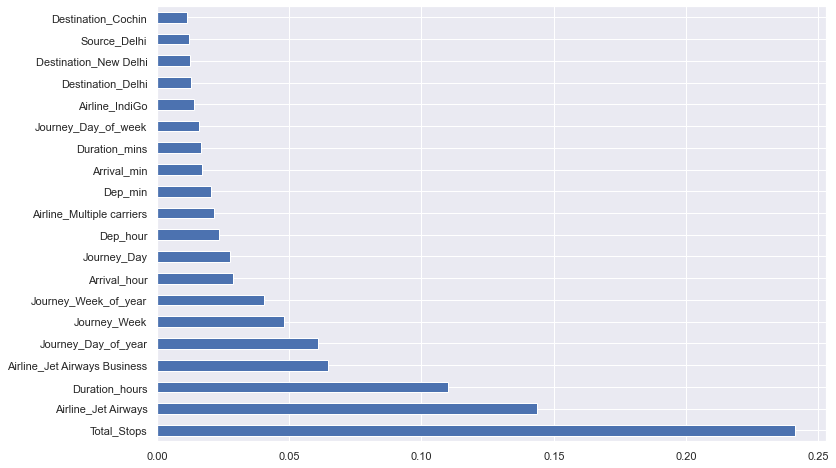

In [59]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('X train shape is {} and X test shape is {}'.format(X_train.shape,X_test.shape))
print('y train shape is {} and y test shape is {}'.format(y_train.shape,y_test.shape))

X train shape is (8545, 35) and X test shape is (2137, 35)
y train shape is (8545,) and y test shape is (2137,)


In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
y_pred_rf = rf.predict(X_test)
rf.score(X_train, y_train)

0.9528530016942632

In [63]:
from sklearn import metrics

from sklearn.metrics import mean_squared_log_error


def get_error(y_test, y_pred):
    print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [64]:
get_error(y_test,y_pred_rf)

R Squared(Accuracy) 0.7973328392402432
Mean Absolute Error: 1166.8327034916417
Mean Squared Error: 4369920.735359827
Root Mean Squared Error: 2090.4355372409423
Root Mean Squared Log Error 0.18420780291347594


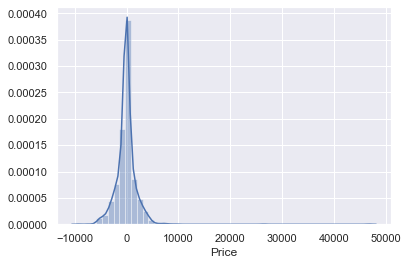

In [65]:
sns.distplot(y_test-y_pred_rf)
plt.show()

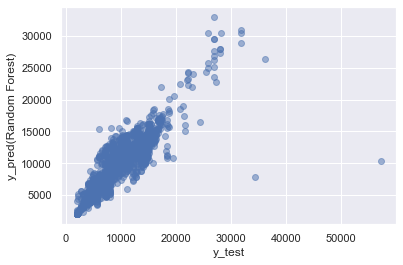

In [66]:
plt.scatter(y_test, y_pred_rf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred(Random Forest)")
plt.show()

In [67]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

0.9430694075998349

In [69]:
get_error(y_test,y_pred_xgb)

R Squared(Accuracy) 0.8506505661424507
Mean Absolute Error: 1140.9438454856033
Mean Squared Error: 3220280.9048181535
Root Mean Squared Error: 1794.5141138531492
Root Mean Squared Log Error 0.16918377471788382


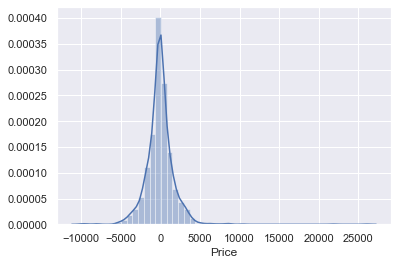

In [70]:
sns.distplot(y_test-y_pred_xgb)
plt.show()

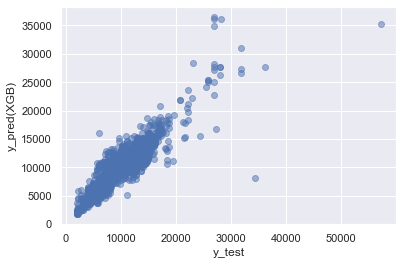

In [71]:
plt.scatter(y_test, y_pred_xgb, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred(XGB)")
plt.show()

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [74]:
### Grids for Random Forest and XGB 

rf_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

xgb_grid = {
    "learning_rate" : [0.1,0.2,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.5],
    "max_depth" : list(range(1,200)),
    "booster" : ['gbtree', 'gblinear' ,'dart'],
    "min_child_weight" : list(range(1,20)),
    "n_estimators" : [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
}

In [75]:
# Random search of parameters, using 5 fold cross validation, 

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [76]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [77]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [78]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [79]:
rf_cv = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rf_cv.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [80]:
y_pred_rfcv = rf_cv.predict(X_test)
rf_cv.score(X_train, y_train)

0.9047017703036565

In [81]:
get_error(y_test,y_pred_rfcv)

R Squared(Accuracy) 0.8142876368661648
Mean Absolute Error: 1136.1250309871411
Mean Squared Error: 4004340.433984941
Root Mean Squared Error: 2001.084814290724
Root Mean Squared Log Error 0.1729920521863867


In [82]:
## Random Grid Search for XGB
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = xgb_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [83]:
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=110, min_child_weight=15, max_depth=69, learning_rate=0.04, booster=dart 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=110, min_child_weight=15, max_depth=69, learning_rate=0.04, booster=dart, total=  14.8s
[CV] n_estimators=110, min_child_weight=15, max_depth=69, learning_rate=0.04, booster=dart 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.7s remaining:    0.0s


[CV]  n_estimators=110, min_child_weight=15, max_depth=69, learning_rate=0.04, booster=dart, total=   9.6s
[CV] n_estimators=110, min_child_weight=15, max_depth=69, learning_rate=0.04, booster=dart 
[CV]  n_estimators=110, min_child_weight=15, max_depth=69, learning_rate=0.04, booster=dart, total=   7.3s
[CV] n_estimators=110, min_child_weight=15, max_depth=69, learning_rate=0.04, booster=dart 
[CV]  n_estimators=110, min_child_weight=15, max_depth=69, learning_rate=0.04, booster=dart, total=  10.5s
[CV] n_estimators=110, min_child_weight=15, max_depth=69, learning_rate=0.04, booster=dart 
[CV]  n_estimators=110, min_child_weight=15, max_depth=69, learning_rate=0.04, booster=dart, total=   8.4s
[CV] n_estimators=50, min_child_weight=1, max_depth=96, learning_rate=0.04, booster=dart 
[CV]  n_estimators=50, min_child_weight=1, max_depth=96, learning_rate=0.04, booster=dart, total=   2.7s
[CV] n_estimators=50, min_child_weight=1, max_depth=96, learning_rate=0.04, booster=dart 
[CV]  n_est

[CV]  n_estimators=10, min_child_weight=16, max_depth=136, learning_rate=0.08, booster=gbtree, total=   0.4s
[CV] n_estimators=10, min_child_weight=16, max_depth=136, learning_rate=0.08, booster=gbtree 
[CV]  n_estimators=10, min_child_weight=16, max_depth=136, learning_rate=0.08, booster=gbtree, total=   0.4s
[CV] n_estimators=100, min_child_weight=5, max_depth=110, learning_rate=0.04, booster=dart 
[CV]  n_estimators=100, min_child_weight=5, max_depth=110, learning_rate=0.04, booster=dart, total=   9.6s
[CV] n_estimators=100, min_child_weight=5, max_depth=110, learning_rate=0.04, booster=dart 
[CV]  n_estimators=100, min_child_weight=5, max_depth=110, learning_rate=0.04, booster=dart, total=   8.5s
[CV] n_estimators=100, min_child_weight=5, max_depth=110, learning_rate=0.04, booster=dart 
[CV]  n_estimators=100, min_child_weight=5, max_depth=110, learning_rate=0.04, booster=dart, total=   8.2s
[CV] n_estimators=100, min_child_weight=5, max_depth=110, learning_rate=0.04, booster=dart 

[CV]  n_estimators=150, min_child_weight=13, max_depth=5, learning_rate=0.02, booster=gblinear, total=   0.4s
[CV] n_estimators=150, min_child_weight=13, max_depth=5, learning_rate=0.02, booster=gblinear 
[20:33:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=150, min_child_weight=13, max_depth=5, learning_rate=0.02, booster=gblinear, total=   0.5s
[CV] n_estimators=150, min_child_weight=13, max_depth=5, learning_rate=0.02, booster=gblinear 
[20:33:48] WARNIN

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.0min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_par...
                                                          0.03, 0.04, 0.05,
                                                          0.06, 0.07, 0

In [84]:
xgb_random.best_params_

{'n_estimators': 100,
 'min_child_weight': 5,
 'max_depth': 110,
 'learning_rate': 0.04,
 'booster': 'dart'}

In [85]:
xgb_random.best_estimator_

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.04, max_delta_step=0, max_depth=110,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
xgb_cv = XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.04, max_delta_step=0, max_depth=110,
             min_child_weight=5, missing=np.nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

xgb_cv.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.04, max_delta_step=0, max_depth=110,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
y_pred_xgbcv = xgb_cv.predict(X_test)
xgb_cv.score(X_train, y_train)

0.9412280272689437

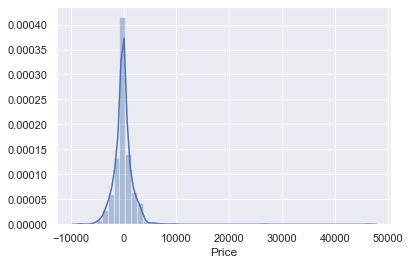

In [88]:
sns.distplot(y_test-y_pred_rfcv)
plt.show()

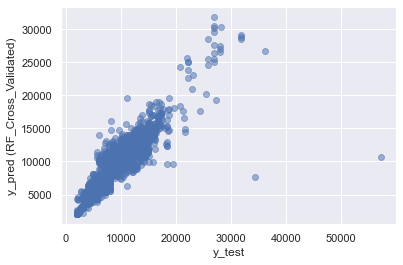

In [89]:
plt.scatter(y_test, y_pred_rfcv, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred (RF_Cross_Validated)")
plt.show()

## Saving the best model

In [90]:
import pickle
file=open('flight_rfcv.pkl', 'wb')
pickle.dump(rf_cv, file)

In [91]:
model = open('flight_rfcv.pkl','rb')
random_f = pickle.load(model)

In [92]:
y_prediction = random_f.predict(X_test)
y_prediction[0]

16912.223226334707

In [93]:
print('Accuracy of the best model is {}%'.format(round(metrics.r2_score(y_test, y_prediction)*100,4)))

Accuracy of the best model is 81.4288%
